# Analysis de origen de los datos de audio
Se comprueba y compara el rendimiento de dos modelos con la misma arquitectura entrenados con datos captados con
microcontrolador y con datos de fuentes externas respectivamente.
## Imports

In [1]:
from audio_model_evaluation import tensorflow_model_evaluation

## Parámetros

In [2]:
project_dir = "/home/daniel/PycharmProjects/tfg-tinyml"
saved_models_dir = f"{project_dir}/saved models/audio"
micro_data_test_dir = f"{project_dir}/samples/microcontroller/audio/test"
micro_data_all_dir = f"{project_dir}/samples/microcontroller/audio/all"
ext_data_test_dir = f"{project_dir}/samples/external/audio/test"
ext_data_all_dir = f"{project_dir}/samples/external/audio/all"
micro_model_dir = f"{saved_models_dir}/tensorflow/MicroAudioDataModel"
ext_model_dir = f"{saved_models_dir}/tensorflow/ExtAudioDataModel"
label_index_dir = f"{saved_models_dir}/label index mappings"
micro_label_index_path = f"{label_index_dir}/MicroAudioDataModel.joblib"
ext_label_index_path = f"{label_index_dir}/ExtAudioDataModel.joblib"

## Modelo entrenado con datos de origen externo
Comprobamos el rendimiento del modelo entrenado con datos de origen externo con la partición test de los
datos de origen externo y con el conjunto de imágenes obtenidas con microcontrolador.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow/ExtAudioDataModel".
Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/external/audio/test".
Using 3230 samples.
Instructions for updating:
The `validate_indices` argument has no effect. Indices are always validated on CPU and never validated on GPU.


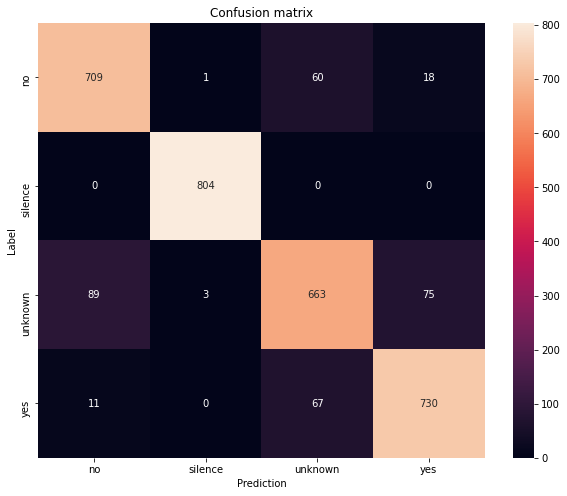

              precision    recall  f1-score   support

          no    0.87639   0.89975   0.88791       788
     silence    0.99505   1.00000   0.99752       804
     unknown    0.83924   0.79880   0.81852       830
         yes    0.88700   0.90347   0.89516       808

    accuracy                        0.89969      3230
   macro avg    0.89942   0.90050   0.89978      3230
weighted avg    0.89903   0.89969   0.89918      3230

Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/microcontroller/audio/all".
Using 452 samples.


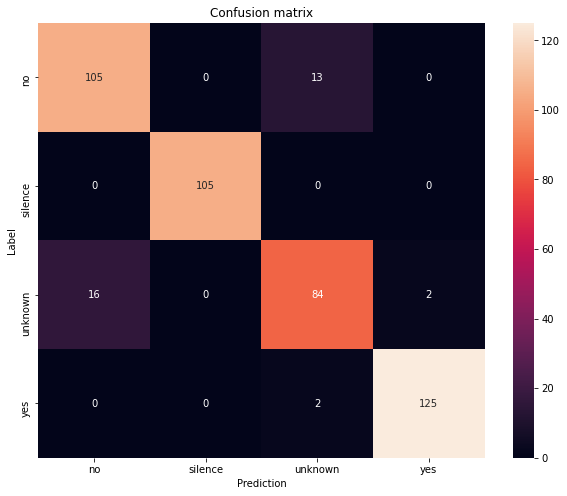

              precision    recall  f1-score   support

          no    0.86777   0.88983   0.87866       118
     silence    1.00000   1.00000   1.00000       105
     unknown    0.84848   0.82353   0.83582       102
         yes    0.98425   0.98425   0.98425       127

    accuracy                        0.92699       452
   macro avg    0.92513   0.92440   0.92468       452
weighted avg    0.92686   0.92699   0.92685       452



In [3]:
tensorflow_model_evaluation(ext_model_dir, ext_label_index_path, [ext_data_test_dir, micro_data_all_dir])

## Modelo entrenado con datos obtenidos con microcontrolador
Comprobamos el rendimiento del modelo entrenado con datos obtenidos con microcontrolador con la partición test de los
datos obtenidos con microcontrolador y con la partición test de los datos de origen externo.

Testing model located in "/home/daniel/PycharmProjects/tfg-tinyml/saved models/audio/tensorflow/MicroAudioDataModel".
Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/microcontroller/audio/test".
Using 91 samples.


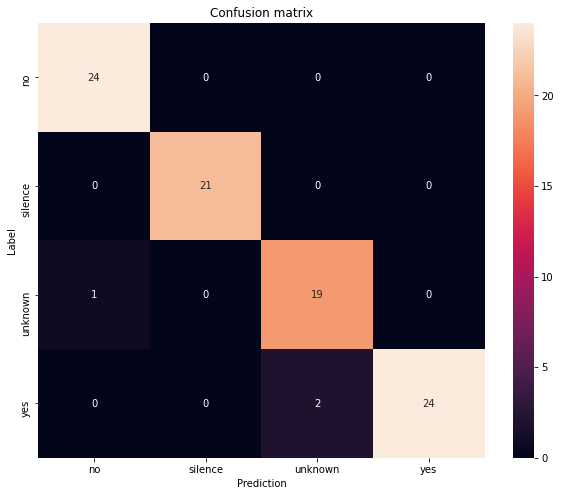

              precision    recall  f1-score   support

          no    0.96000   1.00000   0.97959        24
     silence    1.00000   1.00000   1.00000        21
     unknown    0.90476   0.95000   0.92683        20
         yes    1.00000   0.92308   0.96000        26

    accuracy                        0.96703        91
   macro avg    0.96619   0.96827   0.96661        91
weighted avg    0.96852   0.96703   0.96711        91

Testing model with files located in "/home/daniel/PycharmProjects/tfg-tinyml/samples/external/audio/all".
Using 16154 samples.


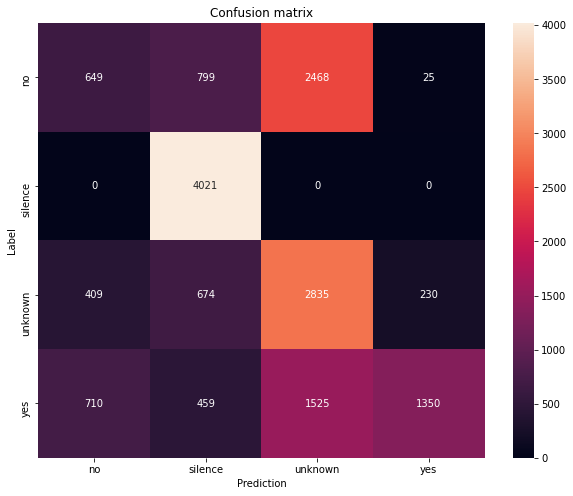

              precision    recall  f1-score   support

          no    0.36708   0.16468   0.22736      3941
     silence    0.67546   1.00000   0.80630      4021
     unknown    0.41520   0.68346   0.51658      4148
         yes    0.84112   0.33383   0.47796      4044

    accuracy                        0.54816     16154
   macro avg    0.57472   0.54549   0.50705     16154
weighted avg    0.57487   0.54816   0.50847     16154



In [4]:
tensorflow_model_evaluation(micro_model_dir, micro_label_index_path, [micro_data_test_dir, ext_data_all_dir])